In [1]:
# Sneha Dubey - W1618643
# Dr. Chen
# CSCI 184
# 15 May 2024
# Homework 2 Part 2: Programming

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
# Step 1: Loading in cancer.csv into a pandas DataFrame and printing the shape

cancerData = pd.read_csv("cancer.csv")
cancerData

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Step 2: Printing the names and data types of the columns

cancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

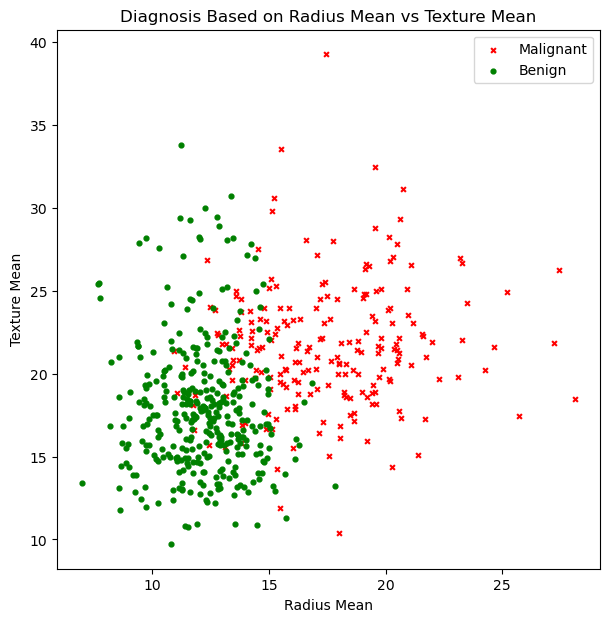

In [5]:
# Step 3: Plotting ‘Radius Mean’ vs ‘Texture Mean’ along with the classes represented as colors or shapes
    # Is the data linearly seperable?
        # No, it looks like a boundary drawn between Malignant and Benign tumors would not be linear.

plt.figure(figsize=(7, 7))

# plot RM vs TM for malignant examples
plt.scatter(cancerData[cancerData['diagnosis'] == 'M']['radius_mean'] , cancerData[cancerData['diagnosis'] == 'M']['texture_mean'], label="Malignant", c = 'red', s = 12, marker='x')

# plot RM vs TM for benign examples
plt.scatter(cancerData[cancerData['diagnosis'] == 'B']['radius_mean'] , cancerData[cancerData['diagnosis'] == 'B']['texture_mean'], label="Benign", c = 'green', s = 12, marker='o')

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Diagnosis Based on Radius Mean vs Texture Mean')
plt.legend()
plt.show()

In [6]:
# Step 4: Encoding the target variable using label encoding

preprocessedData = cancerData # ensuring that the original data isn't tampered with

encoder = preprocessing.LabelEncoder()
preprocessedData['diagnosis'] = encoder.fit_transform(preprocessedData['diagnosis'])
preprocessedData # check that it's correctly encoded

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
# Step 5: Dividing the data into X (features) and Y (target)

# assigning features to X and target to Y
X = preprocessedData.drop(['id', 'Unnamed: 32'], axis = 1) # removing unnecessary columns while I'm at it
Y = preprocessedData['diagnosis']

In [8]:
# Step 6: Splitting the data into train and test data (70:30)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.7, random_state = 0)

In [9]:
# Step 7: Choosing a Naive Bayes and training the model
    
# I chose Gaussian Naive Bayes because it is the one that is most compatible with the given cancer.csv features
    # Because the features are numeric and continuous, I'm choosing to stay away from any NB algorithm that works with binary and/or categorical values
    # I am also choosing not to use Multinomial NB because I don't believe this data is multinomially distributed
        # This also justifies why I'm choosing not to use Complement NB
    # Out-of-Core NB is not needed in this case because the data is of a manageable magnitude

In [10]:
# Step 8: Testing the model and printing its performance matrix

gaussian = GaussianNB()
Ypred = gaussian.fit(Xtrain, Ytrain).predict(Xtest)

print("Classification Report:")
print(classification_report(Ytest, Ypred))

errors = 0
for pred, actual in zip(Ypred, Ytest):
    if pred != actual:
        errors += 1

print("Number of Mis-Classifications: ", errors)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

Number of Mis-Classifications:  0


In [11]:
# End of program! The model performs very well